<h1 style="color:rgb(0,120,170)">Gaussian Classifier, Bias-Variance Decomposition, Evaluation Measures </h1>

<h2 style="color:rgb(0,120,170)">Task 1: Gaussian classifier: visualization & parameter estimation (10 points)</h2>

The goal of this task is to explore the given (artificial) data before diving into the classification function. To do this, we will use `matplotlib` to plot the data set and `numpy` to estimate the means & covariance matrices of the classes as well as the probability of encountering a positive/negative example.

* **Task 1.1**: Visualize the data stored in `normal.csv` with two different colors using a scatter plot and store it in the given variable. Always label the axes of all your plots.
* **Task 1.2**: We assume that the data is distributed according to a two-dimensional multivariate normal distribution:
    - Write a function that estimates the means and covariance matrices of each class as well as the distributions $p(y=+1)$ and $p(y=-1)$
    - Return a tuple containing the results (the resulting list should be of length 6). The datatype for `covXpos`, `covXneg`, `meanXpos` and `meanXneg` should be a numpy array, for $p(y=+1)$ and $p(y=-1)$ it should be float.

<h3 style="color:rgb(210,90,80)">1.1. Code & question (4 points):</h3>

In [44]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline  

Text(0, 0.5, 'label')

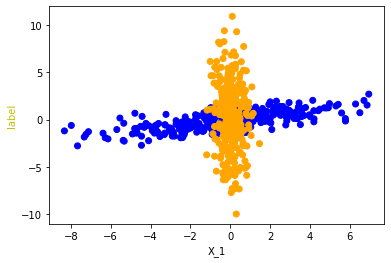

In [15]:
# read data, split into X (features) and y (labels)
Z = np.genfromtxt('normal.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

# your code for the visualization

color = ["blue" if elem > 0 else "orange" for elem in y]
plt.scatter(X[:,0], X[:,1], c=color)
plt.xlabel('X_1', color = 'k')
plt.ylabel('label', color = "y")

***Answer the following yes/no questions concerning the distribution of the data:***

a_) Would a linear regression method be reasonable for this task?<br>
b_) Would a linear classifier roughly achieve a better performance than 33% misclassification?<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question. More details on grading can be found in the [FAQ sheet](https://docs.google.com/document/d/11ccAoEWh1APAoj79kGFiL64_7OL7RApPUHJ2-cvS2s0/edit?usp=sharing).<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [16]:
# examples for you
example_of_true_variable = True
example_of_false_variable = False

# your answers go here ↓↓↓
a_=False
b_=True

<h3 style="color:rgb(210,90,80)">1.2. Code (6 points):</h3>

In [17]:
"""
Function that estimates the means and covariance matrices from the given data as well as the probability to encounter
a positive/negative example respectively
@param X_, np ndarray, data matrix
@param y_, np ndarray, data vector
"""
def est_mean_cov(X_,y_):
    #split features according to labels
    Xpos = X[y == 1]
    Xneg = X[y == -1]
    #compute mean and covariance
    meanXpos = Xpos.mean(axis=0)
    meanXneg = Xneg.mean(axis=0)
    covXpos = np.cov(Xpos[:, 0], Xpos[:, 1])
    covXneg = np.cov(Xneg[:, 0], Xneg[:, 1])
    #compute distribution 
    p_ypos = len(Xpos) / len(y)
    p_yneg = len(Xneg) / len(y)
    return covXpos, meanXpos, p_ypos, covXneg, meanXneg, p_yneg

covXpos, meanXpos, p_ypos, covXneg, meanXneg, p_yneg = est_mean_cov(X,y)
    
# print corresponding values
print("Positive class (blue):\n")
print("Covariance:")
print(pd.DataFrame(covXpos,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("Mean = ", meanXpos, "\n")
print("p(y=+1) =", p_ypos, "\n\n")
print("Negative class (orange):\n")
print("Covariance:")
print(pd.DataFrame(covXneg,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("Mean =", meanXneg, "\n")
print("p(y=-1) =", p_yneg, "\n")

Positive class (blue):

Covariance:
          x1        x2
x1  8.442267  2.017815
x2  2.017815  0.953326 

Mean =  [-0.14820707 -0.03790113] 

p(y=+1) = 0.5 


Negative class (orange):

Covariance:
          x1         x2
x1  0.198607  -0.161064
x2 -0.161064  12.553366 

Mean = [0.0340324  0.16727881] 

p(y=-1) = 0.5 



<h2 style="color:rgb(0,120,170)">Task 2: Gaussian classifier: compute classifier & visualization (20 points)</h2>

Now that we (hopefully) get a good idea of the data, we want to implement a classifier and show its effects using a plot.

- **Task 2.1**: Compute an optimal classification function $g$ in `calc_func_g()` (see slide "Explicit example: Gaussian classifier: Part 2" from lecture Unit2.pdf). To do this, you should:
    - Calculate the values of the corresponding parameters $\mathbf{A}$, $\mathbf{b}$ and $c$ in the provided functions.
    - Store the results in the given parameters **par_A** (np.array), **par_b** (np.array), **par_c** (float), and **func_g** (np.array).
    - Print the values of $\mathbf{A}$, $\mathbf{b}$ and $c$ that you have calculated with their respective shapes.
    - Note: You can reuse the results from the previous exercise here.

* **Task 2.2**: Visualize the classification function and the decision boundaries including the original points from Task 1.1. in **one** two-dimensional plot.


<h3 style="color:rgb(210,90,80)">2.1 Code (10 points):</h3>

In [58]:
"""
These functions should contain the calculations for the respective parameters and return the result.
@param covXpos, np ndarray, covariance matrix of positive examples
@param meanXpos, np ndarray, mean of positive examples
@param covXneg, np ndarray, covariance matrix of negativ examples
@param meanXneg, np ndarray, mean of negative examples
@param p_ypos, float, probability of encountering a positive example
@param p_yneg, float, probability of encountering a negative example
Hint: You may want to check out np.linalg.inv
"""
def calc_par_A(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg):
    covXposInv, covXnegInv = np.linalg.inv(covXpos), np.linalg.inv(covXneg)
    A = covXposInv - covXnegInv
    return A

def calc_par_b(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg):
    covXposInv, covXnegInv = np.linalg.inv(covXpos), np.linalg.inv(covXneg)
    b = (covXposInv @ meanXpos) - (covXnegInv @ meanXneg)
    return b

def calc_par_c(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg):
    covXposInv, covXnegInv = np.linalg.inv(covXpos), np.linalg.inv(covXneg)
    c = 0.5 * (-(meanXpos.T @ covXposInv @ meanXpos) +
           (meanXneg.T @ covXnegInv @ meanXneg) - np.log(np.linalg.det(covXpos)) +
           np.log(np.linalg.det(covXneg))) + np.log(p_ypos) - np.log(p_yneg)
    return c

"""
Combine the previously calculated parameters to the optimal classification function g.
@param points, np.array, the points that the function g should be applied to
"""
def calc_func_g(par_A, par_b, par_c, points):
    return np.sign(-1 / 2 * (points.T @ par_A @ points) + (par_b.T @ points) + par_c) # deal with arrays of shape(2,) due to memory allocation

step_size = 0.01
X0_min = X[:,0].min()
X0_max = X[:,0].max()
X1_min = X[:, 1].min()
X1_max = X[:, 1].max()

x0grid = np.arange(X0_min - 0.1, X0_max + 0.1, step_size)
x1grid = np.arange(X1_min - 0.1, X1_max + 0.1, step_size)
xx, yy = np.meshgrid( x0grid, x1grid)
grid = np.column_stack((xx.ravel(), yy.ravel()))

par_A = calc_par_A(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg)
par_b = calc_par_b(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg)
par_c = calc_par_c(covXpos, meanXpos, covXneg, meanXneg, p_ypos, p_yneg)
func_g = calc_func_g(par_A, par_b, par_c, grid[0]) # memory problem 

# print the values shapes of par_A, par_b, and par_c here
par_A.shape, par_b.shape, par_c, func_g

((2, 2), (2,), -0.23553240713102863, 1.0)

<h3 style="color:rgb(210,90,80)">2.2 Code & question (10 points):</h3>

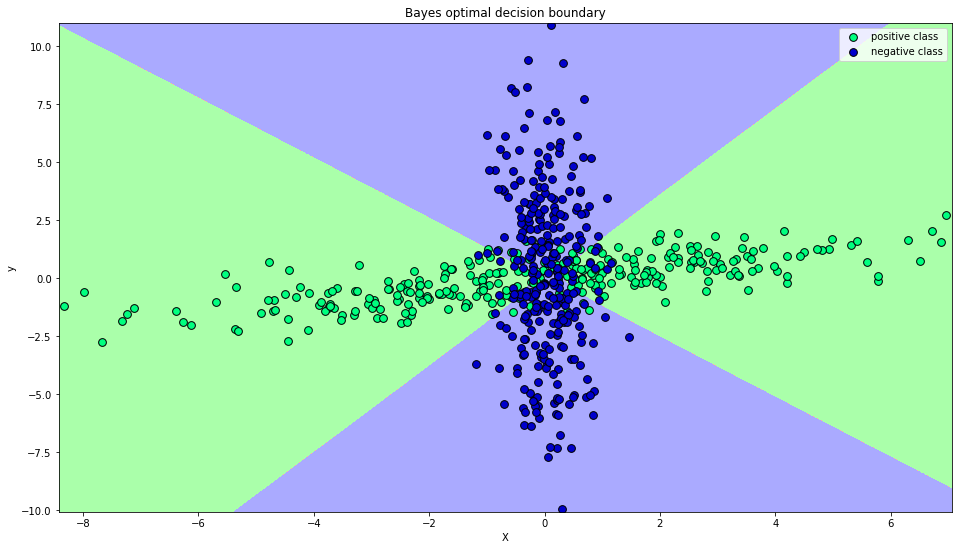

In [59]:

Xpos = X[y == 1]
Xneg = X[y == -1]

classified = np.asarray([calc_func_g(par_A, par_b, par_c, point) for point in grid]).reshape(xx.shape)

# plotting
fig, ax = plt.subplots(figsize=(16, 9))

cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])


ax.contourf(xx, yy, classified, cmap=cmap_light)
ax.scatter(Xpos[:, 0], Xpos[:, 1], c='springgreen', s=60, label='positive class', edgecolor="black")
ax.scatter(Xneg[:, 0], Xneg[:, 1], c='mediumblue', s=60, label='negative class', edgecolor="black")
ax.legend()

plt.title('Bayes optimal decision boundary')
plt.xlabel('X')
plt.ylabel('y')

plt.show()


***Answer the following questions about the plot you just created:***

c_) Did the classifier perform well on the task i.e. do the decision boundaries seem to match the classes as plotted in Task 1.1?<br>
d_) Are datapoints that lie in the middle, overlapping region of the two classes more prone to being misclassified?<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question. More details on grading can be found in the [FAQ sheet](https://docs.google.com/document/d/11ccAoEWh1APAoj79kGFiL64_7OL7RApPUHJ2-cvS2s0/edit?usp=sharing).<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [60]:
# your answers go here ↓↓↓
c_=True
d_=True

<h2 style="color:rgb(0,120,170)">Task 3: Details for bias-variance decomposition for quadratic loss (15 points)</h2>

An explicit formula of the bias variance decomposition for the quadratic loss was mentioned in the lecture. In this task, you will be asked to fill in some details that haven't been discussed there. To this end, let us introduce some notation:

$Z_l$ denotes a data matrix of $l$ elements from our data set $Z =(X,\mathbf{y})$ with $X$ the feature matrix and $\mathbf{y}$ the label vector. $g(\mathbf{x}_0;\mathbf{w}(Z_l)))$ denotes the model, with a parameter vector $\mathbf{w}(Z_l)$ originating from $Z_l$, and $y$ is the label corresponding to a feature vector $\mathbf{x}_0$. 

Our object of interest is the expected prediction error (EPE) for
$\mathbf{x}_0\in X$ in case of the quadratic loss, i.e.:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big(L_{\mathbf{q}}(y,g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)
= \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)$$

We assume that $y\!\mid\!\mathbf{x}_0$ and the selection of training samples $Z_l$ are
independent which results in the following reformulation of the total expected prediction error:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big)\quad \text{(1)}$$

Show that we can obtain the following bias-variance decomposition:

\begin{align*}
\mathrm{EPE}(\mathbf{x}_0)=&\,\operatorname{Var}(y\!\mid\!\mathbf{x}_0)\\
&+\Big(\mathrm{E}_{y\mid\mathbf{x}_0}(y)-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\Big)^2\\
&+\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-E_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2\Big)
\end{align*}

For your calculation please use the given notation. Follow the steps indicated below.

<h3 style="color:rgb(210,90,80)">3.1 Calculation (5 points): Expand the Expected Prediction Error.</h3>

Expand $\mathrm{EPE}(\mathbf{x}_0)$, i.e. eq. (1) above, and write it as three separate terms.

$$
\begin{align*}
g(x_0 ; w(Z_l) &= A \quad \text{for simplification} \\
EPE(x_0) &= E_{y \mid x_0} (E_{Zl}((y-A)^2)) \\
 & = E_{y \mid x_0}(E_{Zl}(y^2) - 2 (E_{Zl}(y) E_{Zl}(A) + E_{Zl}(A^2)) \\
\text{due to independency note that} \quad E_{y \mid x_0}(E_{Zl}(y)) &= E_{y\mid x_0}(y) \\
\text{to show} &= E_{y\mid x_0}(y^2) - 2E_{y\mid x_0}(y) (E_{Zl}(A) +  E_{Zl}(A^2)
\end{align*}
$$

<h3 style="color:rgb(210,90,80)">3.2 Calculation (2 points): Rewrite $\operatorname{Var}(y\!\mid\!\mathbf{x}_0)$ using expected values. </h3>

Write the variance in terms of expectation values.

$$
\begin{align*}
Var[y\mid x_0] &= E_{y \mid x_0}[(y - E_{y \mid x_0}(y))^2] \\
 &= E_{y \mid x_0}(y^2) -  (E_{y \mid x_0}(y))^2
\end{align*}
$$

<h3 style="color:rgb(210,90,80)">3.3. Calculation (3 points): Expand the squared bias.</h3>

Expand the squared bias and write it in three separate terms.

$$
\begin{align*}
bias^2 &= (E[y \mid x_0] - E_{Zl}(A))^2 \\
&= E[y \mid x_0]^2 - 2 E[y \mid x_0] E_{Zl}(A) + (E_{Zl}(A^2)) \\
&= (E_{y \mid x_0}(y))^2 - 2 E_{y \mid x_0}(y) E_{Zl}(A) + E_{Zl}(A^2)
\end{align*}
$$

<h3 style="color:rgb(210,90,80)">3.4 Calculation (5 points): Expand the variance of the model.</h3>

Write the model variance in (first three, then simplified to two) separate terms.

(Eventually, you can see that adding up 3.2., 3.3., and 3.4., some terms cancel and exactly 3.1. remains.)

+ first term:
$$
E_{y \mid x_0}(y^2) -  (E_{y \mid x_0}(y))^2
$$
+ second term:
$$
(E_{y \mid x_0}(y))^2 - 2 E_{y \mid x_0}(y) E_{Zl}(A) + E_{Zl}(A^2)
$$
+ third term:
$$
\begin{align*}
\text{variance of the model} &= E_{Zl}[(A - E_{Zl}(A))^2] \\
&= E_{Zl}(A^2 - 2 A E_{Zl}(A) + E_{Zl}(A^2) \\
&= E_{Zl}(A^2) - 2 E_{Zl}(A)E_{Zl}(A) + E_{Zl}(A^2) \\
&= E_{Zl}(A^2) - 2 E_{Zl}(A^2) + E_{Zl}(A^2) \\
&= 0
\end{align*}
$$
+ first and second term:
$$
E_{y \mid x_0}(y^2) -  (E_{y \mid x_0}(y))^2 + (E_{y \mid x_0}(y))^2 - 2 E_{y \mid x_0}(y) E_{Zl}(A) + E_{Zl}(A^2) \\
E_{y \mid x_0}(y^2) - 2 E_{y \mid x_0}(y) E_{Zl}(A) + E_{Zl}(A^2) \quad \square \\ 
$$

<h2 style="color:rgb(0,120,170)">Task 4: Bias-variance decomposition for regression (40 points)</h2>

<h3 style="color:rgb(210,90,80)">4.1 Question (10 points):</h3>

Consider the following one-dimensional regression task: inputs $x$ are
sampled from the uniform distribution in $[−1, 3] \subset \mathbb{R}$ and targets $y$ are given as

\begin{align*}
f(x) &= 0.6\,x^4 + 2\,x^3 - 8\,x^2 \\
y &= f(x) + \varepsilon,
\end{align*}

where $\varepsilon$ is independent normally distributed noise with $\mu=0$ and $\sigma^2 = 0.09$. 

***What are $E(y\!\mid\!x_0)$ and the unavoidable error $\operatorname{Var}(y\!\mid\!x_0)$ for a fixed $x_0$ in this setting?***

e_)   $E(y\!\mid\!x_0) = 0.6\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \text{    and    } \operatorname{Var}(y\!\mid\!x_0) = x_0^2$. <br>
f_)   $E(y\!\mid\!x_0) = 0.6\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \text{ and }\operatorname{Var}(y\!\mid\!x_0) = \sigma^2$. <br>
g_)   $E(y\!\mid\!x_0) = 0.6\,\sigma^4 + 2\,\sigma^3 - 8\,\sigma^2 \text{ and }  \operatorname{Var}(y\!\mid\!x_0) = \sigma^2$. <br>
h_)   $E(y\!\mid\!x_0) = 0.6\,x_0^4 + 2\,x_0^3 - 8\,x_0^2 \text{    and    } \operatorname{Var}(y\!\mid\!x_0) = 0.6\,x_0^4 + 2\,x_0^3 - 8\,x_0^2+\sigma^2$.<br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question. More details on grading can be found in the [FAQ sheet](https://docs.google.com/document/d/11ccAoEWh1APAoj79kGFiL64_7OL7RApPUHJ2-cvS2s0/edit?usp=sharing).<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [61]:
# your answers go here ↓↓↓
e_=False
f_=True
g_=False
h_=False

We intend to perform polynomial regression to illustrate the bias-variance decomposition for the regression task described before. To this end, perform the following steps:
 * **Task 4.2**:
    * Implement the function `create_train_X` which should return $k=200$ training sets with $l=20$ samples in the form of a numpy array.
    * Implement the function `create_train_y` according to the function described at the beginning of this task.
    * Below, we provide the code for a function that trains a polynomial regression model with degree $m$ on a given training set and returns the prediction for a given test set. Use this to implement the function `bias_var` that estimates for each degree $m=1,...,11$ the squared bias and the variance from the predictions for each of the $k=200$ training sets at $x_0=1.8$ and stores them in the lists sqbias and variance (which are already initiated as empty lists). Each of these two lists should then only contain $11$ elements.
 * **Task 4.3**: 
   * Utilize the function `pol_reg_pred` to produce <em>one</em> plot that simultaneously visualizes the training data as dots (plot only the <em>first</em> instance of the $k$ training sets, i.e. the 20 points from the first set) and the corresponding models for $m=1,3,11$. Don't forget to label the axes. Note: Make sure to produce the plot in the correct (second) cell.
   * Finally, visualize your results in <em>one</em> plot where the dependence of the variance and squared bias versus $m$ is shown. Again, the axes should be labeled appropriately.

<h3 style="color:rgb(210,90,80)">4.2 Code (15 points):</h3>

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# some code that should help you
# do not change the seed
np.random.seed(14)

def pol_reg_pred(X_train,y_train,X_test,m):
    poly_reg = PolynomialFeatures(m)
    X_poly_train = poly_reg.fit_transform(X_train.reshape(-1, 1))
    X_poly_test= poly_reg.fit_transform(X_test.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    return y_pred

def f(x):
    return 0.6 * x**4 + 2 * x**3 - 8 * x**2

def f_noise(x):
    return f(x) + np.random.normal(0, np.sqrt(0.09))

def create_train_X(k,l):
    training_set = np.random.uniform(low=-1, high=3, size=(k, l))
    return training_set
    
def create_train_y(k,l,X_train):
    y_train_sets = np.array([[f_noise(data) for data in sets] for sets in X_train]) 
    return y_train_sets

k = 200
l = 20
M = 11
X_train = create_train_X(k,l)
y_train = create_train_y(k,l,X_train)

def squared_bias(x0, predictions):
    return (f(x0) - np.mean(predictions))**2

def bias_var(X_train,y_train): 
    x0 = np.array([1.8])
    sqbias = []
    variance = []
    
    for m in list(range(1,12)):
        predictions = list()
        for i in range(len(X_train)):
            predictions.append(pol_reg_pred(X_train[i], f_noise(X_train[i]), x0, m))
        
        sqbias.append(squared_bias(1.8, predictions))
        variance.append(np.var(np.array(predictions)))
    
    return (sqbias,variance)
    
sqbias, variance = bias_var(X_train,y_train)
print(X_train.shape,y_train.shape)
print(len(sqbias))
print(len(variance))

(200, 20) (200, 20)
11
11


<h3 style="color:rgb(210,90,80)">4.3 Code (10 points):</h3>

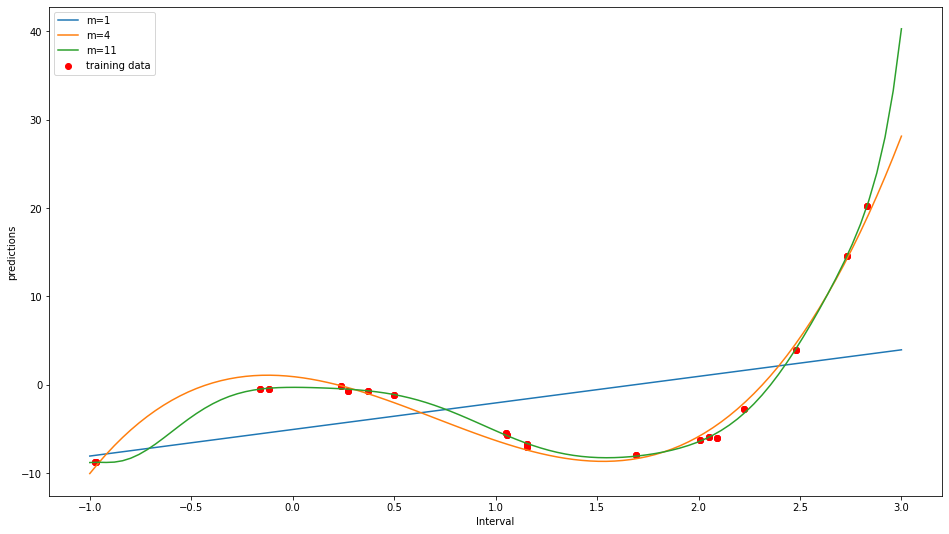

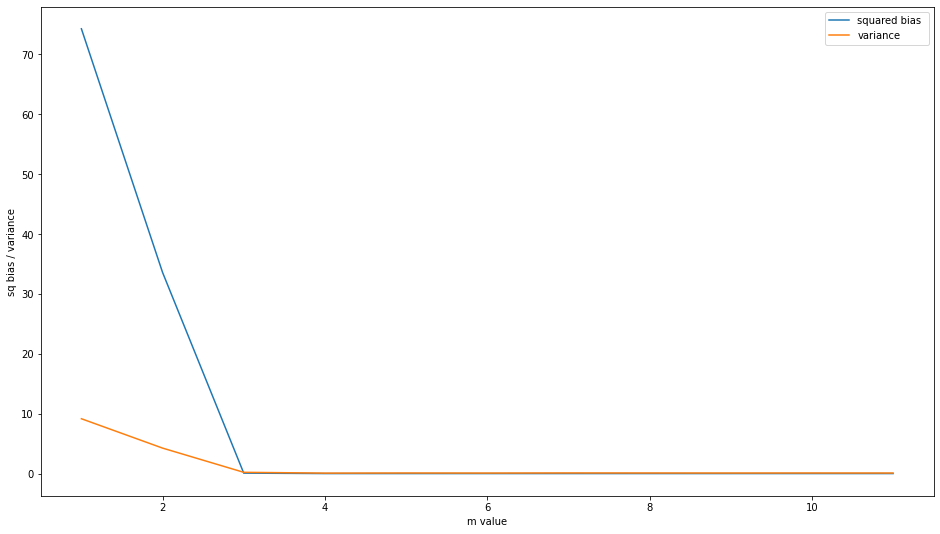

In [74]:
X_train_first = X_train[0,:]
y_train_first = np.array([f_noise(sample) for sample in X_train_first])


X_test = np.linspace(-1, 3, 100)

plt.figure(figsize=(16,9))

polynomial_level = [1,3,11]

for m in polynomial_level:
    predictions = pol_reg_pred(X_train_first, y_train_first, X_test, m)
    plt.plot(X_test, predictions)
    plt.scatter(X_train_first, y_train_first, label=f"m = {m}",color="r")
    plt.xlabel("Interval")
    plt.ylabel("predictions")
    plt.legend(['m=1','m=4','m=11','training data'])

plt.figure(figsize=(16,9))
plt.plot(range(1,12), sqbias)
plt.plot(range(1,12), variance)
plt.xlabel("m value")
plt.ylabel("sq bias / variance")    
plt.legend(('squared bias ', 'variance'))

<h3 style="color:rgb(210,90,80)">4.4 Question (5 points):</h3>

If you did the previous task correctly, the resulting plot should look like this:

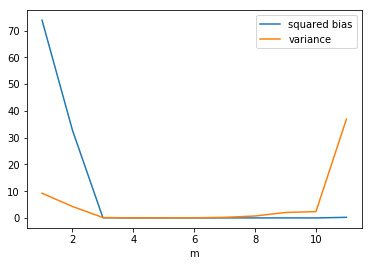    


***What observations can you make from this plot? Tick the correct boxes (several may be correct):***


i_)   The variance is lowest for models which are too simple, i.e. $m<3$. <br>
j_) For appropriate complexity, i.e. $3 \leq m < 7$, both model variance and bias are low, which indicates good generalization abilities.<br>
k_)   As the model becomes too complex, i.e. $m \geq 7$, the variance increases again while the bias still decreases. This is an indication for underfitting.<br>
l_) For models with $m \geq 7$, the variance is high (i.e. significantly larger than $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>
m_)  For models with $m \geq 7$, the bias is still low (i.e. close to $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question. More details on grading can be found in the [FAQ sheet](https://docs.google.com/document/d/11ccAoEWh1APAoj79kGFiL64_7OL7RApPUHJ2-cvS2s0/edit?usp=sharing).<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [76]:
# your answers go here ↓↓↓
i_=True
j_=False
k_=True
l_=False
m_=True

<h2 style="color:rgb(0,120,170)">Task 5: Evaluation metrics for imbalanced data sets (15 points)</h2>

Consider a classifier with discriminant function $\bar g$.
For a given labeled data set, the following results are obtained:
$$\begin{array}{|r|r|}
\hline
y & \bar g(x)\\
\hline \hline
 +1 & 0.93 \\
 +1 & 0.51 \\
 +1 & 0.48 \\
 -1 & 0.13 \\
 +1 & 0.02 \\
 -1 & -0.11 \\
 -1 & -0.25 \\
 -1 & -0.37 \\
 +1 & -0.41 \\
 -1 & -1.68 \\
 +1 & -2.23 \\
\hline
\end{array}$$

* **Task 5.1**: Compute the confusion matrix using the usual zero threshold.
Complete the given function to calculate the following evaluation measures:
ACC, TPR, TNR, FPR, FNR, PREC, and $F_1$, and store the exact results in the respective variables.

<h3 style="color:rgb(210,90,80)">5.1 Calculation (8 points):</h3>

* <b>Reminder:</b> Confusion Matrix structure:

$$
\begin{array}{|c|c|c|}
\hline
 &\bar g(x)=+1  & \bar g(x)=-1\\
 \hline
 y=+1 & \text{TP}  & \text{FN} \\
 \hline
 y=-1 & \text{FP} & \text{TN} \\
\hline
\end{array}
$$

In [3]:
# confusion matrix
_TP = 4
_TN = 4
_FP = 1
_FN = 2

# evaluation measures
def evaluate_measures(TP,TN,FP,FN): 
    P = TP + FN
    N = FP + TN
    ACC = (TP + TN) / (P + N)
    TPR = TP / P
    TNR = TN / N
    FPR = FP / N
    FNR = FN / P
    PREC = TP / (TP + FP)
    BACC = (TPR + TNR) / 2
    F1 = 2 * PREC * TPR / (PREC + TPR)
    return (ACC,TPR,TNR,FPR,FNR,PREC,BACC,F1)
    
_ACC,_TPR,_TNR,_FPR,_FNR,_PREC,_BACC,_F1 = evaluate_measures(_TP,_TN,_FP,_FN)

print("ACC: {:.3f}\nTPR: {:.3f}\nTNR: {:.3f}\nFPR: {:.3f}\nFNR: {:.3f}\nPREC: {:.3f}\nBACC: {:.3f}\nF1: {:.3f}".format(_ACC,_TPR,_TNR,_FPR,_FNR,_PREC,_BACC,_F1))

ACC: 0.727
TPR: 0.667
TNR: 0.800
FPR: 0.200
FNR: 0.333
PREC: 0.800
BACC: 0.733
F1: 0.727


Let's say we have a population of 1000 people and we know that 50 are infected with the corona virus.
* **Task 5.2**: Assume that the population is tested with an assay that has a certain specificity and sensitivity. What is the probability that a person is *not* infected if they are diagnosed as ill by the test? Write a function that returns the desired value. Then check your calculation using specificity of $97 \%$ and sensitivity of $98 \%$.

**Note**: Round your result to 3 decimal points, i.e. 0.987 if its 98.7%

<h3 style="color:rgb(210,90,80)">5.2 Calculation (7 points):</h3>

In [12]:
"""
This function should return the desired probability. 
@param spec, float, specificity
@param sens, float, sensitivity
@param pop, int, population
@param inf, int, infected
"""
def calc_prob(spec,sens,pop,inf):
    population = pop
    infected = inf
    
    TP = infected
    N = pop - inf
    # TNR = TN / N
    TN = spec * N
    FP = N - TN
    PREC = TP / (TP + FP)
    result = 1 - PREC
    return round(result, 3)
    
_result = calc_prob(0.97,0.98,1000,50)
print("The probability that a person who is tested positive is in fact not infected is {}".format(_result))

The probability that a person who is tested positive is in fact not infected is 0.363
